# Tugas Besar 1 ML
<ul>
    <li>13515032 Helena Suzane Graciella Ringoringo</li>
    <li>13515046 Lathifah Nurrahmah</li>
    <li>13515098 Aya Aurora Rimbamorani</li>
</ul>

# K-Means dan K-Medoids


K-means dan K-modes adalah algoritma clustering dengan melakukan partisi antara data. K-means adalah algoritma clustering dengan melakukan pengelompokan berdasarkan means dari data sebagai centroid. K-medoids adalah algoritma clustering dengan melakukan pengelompokan berdasarkan modus, atau <i>instance</i> tengah dari seluruh data. 

## Penjelasan dan Pseudo Code
### K-Means
    assign k centroid randomly
    for i in range(max_iteration)
        assign data to cluster
        recalculate centroid
        if distance(new_centroid, centroid) < threshold
           break
### K-Medoids
    assign k medoids randomly
    for i in range(max_iteration)
        assign data to cluster
        choose random new medoids
        calculate weight for new medoids
        if new_weight < weight
            medoid = new medoid
        else
            break


## Source Code

Load data dari dataset sklearn

In [481]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
label = iris.target

Implementasi fungsi euclidean distance yang digunakan untuk menentukan jarak antara dua data

In [87]:
from math import sqrt

def euclidean_distance(instance1, instance2):
    return sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2 + (instance1[2]-instance2[2])**2
        + (instance1[3]-instance2[3])**2)

Implementasi fungsi kmeans

In [474]:
from random import randint

def kmeans(data, k, max_iter):
    centroid = []
    for i in range (0, k):
        centroid.append(data[i * int(((len(data) - 1)/k)) - 1])
    cluster = [-1] * len(data)
    for ii in range (0, max_iter):
        for ij in range(0, len(cluster)):
            clust = -1
            min_dist = 100
            for ik in range(0, len(centroid)):
                distance = euclidean_distance(data[ij], centroid[ik])
                if (distance < min_dist):
                    clust = ik
                    min_dist = distance
            cluster[ij] = clust
        total = [[0]*len(data[0])] * k
        count = [0] * k
        for ij in range(0, len(cluster)):
            add_data = []
            for ik in range(0, len(data[ij])):
                add_number = total[cluster[ij]][ik] + data[ij][ik]
                add_data.append(add_number)
            count[cluster[ij]] += 1
            total[cluster[ij]] = add_data
        new_centroid = [[0] * len(data[0])] * k
        for ij in range(0, len(centroid)):
            add_data = []
            for ik in range(0, len(centroid[ij])):
                add_number = total[ij][ik] / count[ij]
                add_data.append(add_number)
            new_centroid[ij] = add_data
        
        centroid = new_centroid
        less_threshold = False
        for ij in range(0, len(centroid)):
            if (euclidean_distance(centroid[ij], new_centroid[ij]) < 0.05):
                less_threshold = True
        if less_threshold:
            break
    return centroid, cluster
centroid, cluster = kmeans(data, 3, 1000)

Implementasi fungsi prediksi Kmeans dan hasil prediksi

In [477]:
def kmeans_predict (data, centroid):
    cluster = []
    for i in data:
        clust = -1
        min_dist = 100
        for ik in range(0, len(centroid)):
            distance = euclidean_distance(i, centroid[ik])
            if (distance < min_dist):
                clust = ik
                min_dist = distance
        cluster.append(clust)
    return cluster

print(kmeans_predict(data, centroid))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Implementasi fungsi manhattan distance yang digunakan untuk menghitung jarak antara dua data pada K-modes

In [110]:
def manhattan_distance(instance1, instance2):
    distance = abs(instance1[0]-instance2[0]) + abs(instance1[1]-instance2[1]) + abs(instance1[2]-instance2[2]) + abs(instance1[3]-instance2[3])
    return distance

Implementasi perhitungan weight untuk k-medoids

Implementasi fungsi k-medoids

In [468]:
def calculate_weight(data, cluster, medoid):
    weight = 0
    for i in range(0, len(cluster)):
        weight += manhattan_distance(data[i], data[medoid[cluster[i]]])
    return weight
def kmedoids(data, k, max_iter):
    medoid = []
    next_medoid = []
    cluster = [-1] * len(data)
    next_cluster = [-1] * len(data)
    last_weight = 10000
    for i in range (0, k):
        medoid.append(i * int(((len(data) - 1)/k)))
    for ij in range(0, len(cluster)):
        clust = -1
        min_dist = 100
        for ik in range(0, len(medoid)):
            distance = manhattan_distance(data[ij], data[medoid[ik]])
            if (distance < min_dist):
                clust = ik
                min_dist = distance
        cluster[ij] = clust
    c = 0
    for i in range(0, max_iter):
        next_medoid = []
        for ii in range (0, k):
            rand = randint(0, len(data)-1)
            check_medoid = True
            while check_medoid:
                if rand not in next_medoid and cluster[rand] == ii:
                    check_medoid = False
                else:
                    rand = randint(0, len(data) - 1)
            next_medoid.append(rand)
                
#             if (ii == c):
#                 rand = randint(0, len(data)-1)
#                 check_medoid = True
#                 while (check_medoid):
#                     if rand not in medoid and cluster[rand] == ii:
#                         check_medoid = False
#                     else:
#                         rand = randint(0, len(data) - 1)
#                 next_medoid.append(rand)
#             else:
#                 next_medoid.append(medoid[ii])
#             print(next_medoid)
        for ij in range(0, len(next_cluster)):
            clust = -1
            min_dist = 100
            for ik in range(0, len(medoid)):
                distance = manhattan_distance(data[ij], data[next_medoid[ik]])
                if (distance < min_dist):
                    clust = ik
                    min_dist = distance
            next_cluster[ij] = clust
        weight = calculate_weight(data, cluster, next_medoid)
        stop_condition = False
        if (next_cluster == cluster):
            stop_condition = True
        if (weight < last_weight):
            last_weight = weight
            medoid = next_medoid
            cluster = next_cluster
            next_medoid = []
        elif (stop_condition):
            break; 
    return medoid, cluster;
medoid, cluster = kmedoids(data, 3, 1000)
        

Implementasi fungsi prediksi k-medoids serta hasil prediksi pada data

In [484]:
def kmedoids_predict (data, medoid):
    cluster = []
    for i in data:
        clust = -1
        min_dist = 100
        for ik in range(0, len(medoid)):
            distance = euclidean_distance(i, medoid[ik])
            if (distance < min_dist):
                clust = ik
                min_dist = distance
        cluster.append(clust)
    return cluster

print(kmedoids_predict (data, data[medoid]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Implementasi fungsi perhitungan akurasi.
Untuk melakukan perhitungan akurasi, digunakan confusion matrix. Confusion matrix digunakan karena label hasil prediksi mungkin tidak tepat dengan label target

## Clustering pada Dataset Iris

In [489]:
from sklearn import metrics
def check_accuracy(pred, target):
    if (len(pred) == len(target)):
        confusion = metrics.confusion_matrix(target, pred)
        total = 0
        for i in range(0, len(confusion)):
            maximum = 0
            for j in range(0, len(confusion[i])):
                if confusion[i][j] > maximum:
                    maximum = confusion[i][j]
            total += maximum
        return(total / len(pred))
    else:
        raise("prediction and target isn't the same size")
print("Akurasi prediksi dengan k-means  :", check_accuracy(kmeans_predict(data, centroid), label))
print("Akurasi prediksi dengan k-medoids:", check_accuracy(kmedoids_predict(data, data[medoid]), label))

Akurasi prediksi dengan k-means  : 0.933333333333
Akurasi prediksi dengan k-medoids: 0.92


# Agglomerative Clustering

## Penjelasan Singkat dan Pseudo Code

Hierarchical clustering merupakan algoritma clustering yang melakukan pengelompokkan terhadap data dengan membangun tingkatan-tingkatan cluster. Salah satu tipe hierarchical clustering yang sering digunakan adalah agglomerative clustering. Pada agglomerative clustering, pendakatan yang digunakan adalah pendekatan "bottom-up", yakni dimana setiap data dianggap sebagai satu cluster yang kemudian setiap pasang data tersebut digabungkan menjadi satu cluster baru. Hal tersebut dilakukan secara berulang-ulang hingga jumlah cluster sesuai dengan jumlah cluster yang diinginkan dimana jumlah cluster akhir lebih kecil daripada jumlah cluster sebelum dilakukan clustering.

1. Menginisialisasi cluster awal dengan singleton cluster sejumlah N data. N jumlah data tersebut kemudian dihitung matriks jarak antar clusternya.
2. Mencari jarak terkecil di matriks jarak antar cluster kemudian menggabungkan kedua cluster tersebut menjadi satu cluster.
3. Memperbarui matriks jarak dengan menghitung jarak cluster baru dengan cluster-cluster lainnya.
4. Mengulangi langkah 2 dan 3 hingga seluruh objek berapa pada satu cluster yang sama

## Source Code

Mengimport library yang diperlukan, menentukan besar diagram scatter

In [91]:
from math import sqrt
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 80))

<Figure size 5760x5760 with 0 Axes>

<Figure size 5760x5760 with 0 Axes>

Fungsi euclidian, berguna dalam menghitung jarak antar objek. Pada data iris, terdapat 4 variabel yang perlu dilibatkan dalam perhitungan jarak

In [10]:
def euclidean_distance(instance1, instance2):
    return sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2 + (instance1[2]-instance2[2])**2
        + (instance1[3]-instance2[3])**2)

Fungsi mean, digunakan dalam agglomerative clustering dengan average dan average group linkage

In [8]:
def mean(data):
    return float(sum(data)) / max(len(data), 1)

Fungsi make_distance_matrix, digunakan untuk menginisialisasi matriks jarak antar cluster

In [9]:
def make_distance_matrix(array):
    distance_matrix = []
    for i in range(0, len(array)):
        distance_matrix.append([])
        for j in range (0, len(array)):
            distance_matrix[i].append(euclidean_distance(array[i], array[j]))
    return distance_matrix

Memuat dataset, menginisialisasi list cluster, dan fungsi untuk menentukan jarak terkecil pada matriks jarak. Penentuan jarak terkecil dilakukan dengan mengakses matriks jarak dan kemudian memasukkan indeks dengan jarak terkecil tersebut ke list idx_min dengan idx_min[0] memiliki nilai indeks lebih kecil daripada idx_min[1]


In [92]:
### Load Datasets
iris = datasets.load_iris()
iris_distance_matrix = make_distance_matrix(iris.data)

In [12]:
def cluster_list_initiate(data_length):
    cluster_list = []
    for i in range(0,data_length):
        cluster_list.append([i])
    return cluster_list

In [43]:
def min_distance(distance_matrix):
    idx_min = []
    min_distance = distance_matrix[0][1]
    for i in range(0, len(distance_matrix)):
        for j in range(0,len(distance_matrix)):
            if i != j and distance_matrix[i][j] < min_distance :
                min_distance = distance_matrix[i][j]
                idx_min = [i,j]
    if len(idx_min) == 0:
        idx_min.append(0)
        idx_min.append(1)
        
    return idx_min

Implementasi fungsi single linkage, complete linkage, average linkage, dan average group linkage. Pada single linkage, pembaruan matriks jarak dilakukan dengan mencari jarak terkecil dari kedua cluster yang digabungkan dengan cluster lain. Pada complete linkage, pembaruan dilakukan mencari jarak terbesar. Pada average linkage, pembaruan dilakukan dengan mencari rerata jarak dari setiap anggota cluster yang digabungkan dengan anggota pada cluster lain. Terakhir, pada average group linkage, pembaruan dilakukan dengan menghitung jarak rerata dari kedua cluster yang digabungkan dengan cluster lain.

Pada setiap algoritma linkage tersebut, dibutuhkan parameter idx_min atau indeks 2 cluster yang memiliki jarak terkecil pada matriks jarak. Berbeda dengan ketiga linkage lainnya, average linkage membutuhkan parameter list cluster karena linkage tersebut perlu mengakses matriks jarak awal antar data yang digunakan untuk melakukan pembaruan jarak.

In [14]:
def single_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with single linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                update_distance_matrix[i][idx_min[0]] = min(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
    
    return update_distance_matrix

In [15]:
def complete_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with complete linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                update_distance_matrix[i][idx_min[0]] = max(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

In [31]:
def average_link_update_matrix(distance_matrix, cluster_list, idx_min):
    
    n_matrix = len(distance_matrix)
    
    mean_list = []
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with average group linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                for k in range(0, len(cluster_list[idx_min[0]])):
                    for l in range (0, len(cluster_list[idx_min[1]])):
                        mean_list.append(iris_distance_matrix[k][l])
                update_distance_matrix[i][idx_min[0]] = mean(mean_list)
                mean_list = []
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

In [24]:
def average_group_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with average linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:             
                update_distance_matrix[i][idx_min[0]] = mean([distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]]])                    
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

Pengimplementasian fungsi merge_cluster memiliki 4 parameter input yaitu, matriks jarak, list cluster, jenis linkage, dan idx_min. Pertama, fungsi ini akan menginisialisasi pembaruan matriks jarak. Kemudian, bergantung kepada jenis linkage, pembaruan matriks jarak pun dilakukan. Setelah itu, dilakukan penghapusan baris dan kolom dengan indeks yang memiliki jarak terkecil, atau indeks yang terdapat pada idx_min. Setelah penghapusan, dilakukan pembaruan jarak pada baris dan kolom cluster yang digabungkan. Fungsi ini mengembalikan pembaruan matriks jarak dan list cluster.

In [44]:
def merge_cluster(distance_matrix,cluster_list,linkage,idx_min):
    result = []
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    if linkage == "single":
        update_distance_matrix = single_link_update_matrix(distance_matrix, idx_min)
    if linkage == "complete":
        update_distance_matrix = complete_link_update_matrix(distance_matrix, idx_min)
    if linkage == "average_group":
        update_distance_matrix = average_group_link_update_matrix(distance_matrix, idx_min)
    if linkage == "average":
        update_distance_matrix = average_link_update_matrix(distance_matrix, cluster_list, idx_min)
        
    # Delete 2nd merged row and column
    for i in range(0, n_matrix):
        # Delete column
        update_distance_matrix[i].pop(idx_min[1])
    
    # Delete row
    update_distance_matrix.pop(idx_min[1])
    
    # Update merged 1st row
    n_matrix = len(update_distance_matrix)
    for i in range(0, n_matrix):
        if i != idx_min[0]:
            update_distance_matrix[idx_min[0]][i] = update_distance_matrix[i][idx_min[0]]
    
    result.append(update_distance_matrix)
    
    # Update Cluster List
    for i in range (0, len(cluster_list[idx_min[1]])):
        cluster_list[idx_min[0]].append(cluster_list[idx_min[1]][i])
    cluster_list.pop(idx_min[1])
    
    result.append(cluster_list)
    
    return result

Fungsi AGGLO_predict memiliki 3 parameter, yaitu data, linkage, dan jumlah cluster. Pada fungsi ini, hal pertama yang dilakukan adalah menginisialisasi matriks jarak dan list cluster. List cluster diinisialisasi dengan daftar singleton cluster sejumlah N data. Setelah itu, akan dilakukan iterasi sebanyak jumlah data dikurang jumlah cluster kali. Iterasi dilakukan sebanyak itu agar hasil akhir mendapatkan sebanyak jumlah cluster yang diinginkan bukan satu cluster besar. Di dalam iterasi, dilakukan assignment nilai idx_min, list cluster, dan matriks jarak. Fungsi ini mengembalikan list cluster.

Fungsi AGGLO_labels memiliki 2 parameter, yaitu data dan list cluster. Fungsi ini berperan dalam menentukan label pada setiap cluster. 

Fungsi calculate_accuracy berperan dalam menghitung banyaknya jumlah hasil predict yang sama dengan data target. Setelah itu, dilakukan perhitungan rasio jumlah hasil predict yang benar atau sama dengan data target dengan keseluruhan data.

In [45]:
def AGGLO_predict(data, linkage, n_cluster):
    distance_matrix = make_distance_matrix(data)
    cluster_list = cluster_list_initiate(len(data))
    
    for i in range (0, len(distance_matrix)-n_cluster):
        idx_min = min_distance(distance_matrix)
        result = merge_cluster(distance_matrix,cluster_list,affinity,idx_min)
        cluster_list = result[1]
        distance_matrix = result[0]
        
    return cluster_list

In [60]:
def AGGLO_labels(data, cluster_list):
    labels = []
    
    n_matrix = len(data)
    
    for i in range (0, n_matrix):
        labels.append(-1)
        
    for i in range (0, len(cluster_list)):
        for j in range (0, len(cluster_list[i])):
            labels[cluster_list[i][j]] = i
    
    return labels

In [65]:
def calculateAccuracy(predictions, actual_targets):
    right_counts = 0
    for i in range(0,len(predictions)):
        if (predictions[i] == actual_targets[i]):
            right_counts += 1
    return (right_counts/len(predictions))

## Clustering pada Dataset Iris

Pada agglomerative clustering dengan data iris menggunakan 
    

1. single linkage didapat akurasi sebesar 0.68
2. complete linkage didapat akurasi sebesar 0.84 dengan melakukan pertukaran label predict pada cluster 1 dan 2
3. average linkage didapat akurasi sebesar 0.34
4. average group linkage didapat akurasi sebesar 0.9

Berdasarkan hasil tersebut, dapat disimpulkan bahwa clustering dengan average group linkage memberikan akurasi terbaik.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


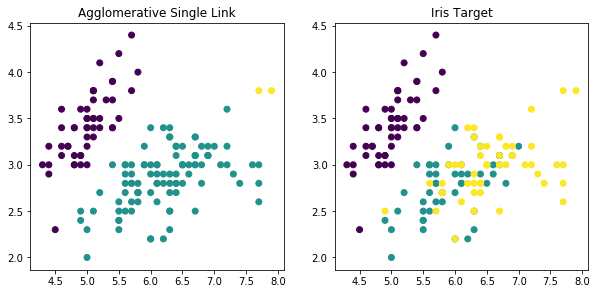

Accuracy :  0.68


In [83]:
labels_single = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'single', 3))
labels_single = np.choose(labels_single, [0,1,2])
print(labels_single)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_single)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Single Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_single, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


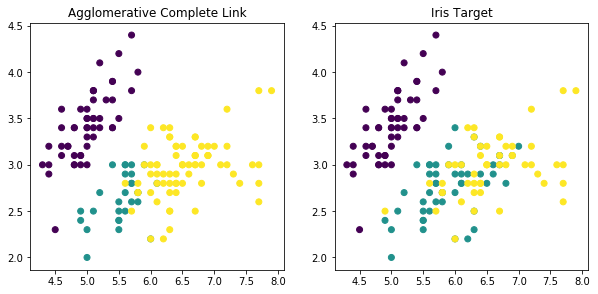

Accuracy :  0.84


In [85]:
labels_complete = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'complete', 3))
labels_complete = np.choose(labels_complete, [0,2,1])
print(labels_complete)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_complete)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Complete Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_complete, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


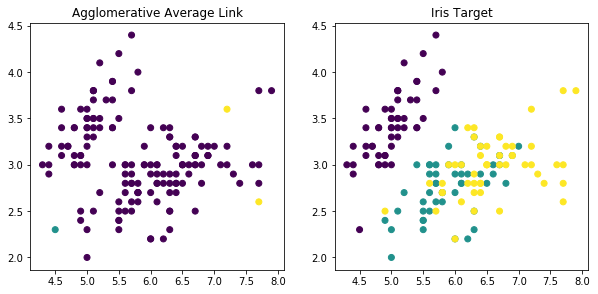

Accuracy :  0.34


In [88]:
labels_average = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'average', 3))
labels_average = np.choose(labels_average, [0,1,2])
print(labels_average)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_average)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Average Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_average, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


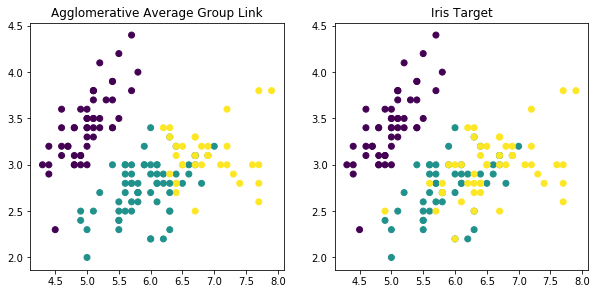

Accuracy :  0.9


In [89]:
labels_average_group = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'average_group', 3))
labels_average_group = np.choose(labels_average_group, [0,1,2])
print(labels_average_group)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_average_group)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Average Group Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_average_group, iris.target))

<h1>DBSCAN</h1>
<h2>Penjelasan Singkat dan Pseudocode</h2>
<p>DBSCAN adalah sebuah algoritma clustering berdasarkan kerapatan pada data. DBSCAN sendiri adalah singkatan dari <i>Density-based spatial clustering of applications with noise</i>. DBSCAN mengelompokkan instance-instance yang dekat menjadi satu kelompok berdasarkan jarak maksimum yang disebut epsilon. Sebuah cluster minimal memiliki anggota sebanyak MinPts.<p>
<p>Pseudocode algoritma DBSCAN adalah sebagai berikut:<p>
<ol>
    <li>Hitung jarak antar masing-masing instance. Buatlah matriks jarak dari setiap instance.</li>
    <li>Untuk setiap instance, tentukan instance mana saja yang termasuk dalam neighborhoodnya: yakni instance mana saja yang memiliki jarak kurang dari epsilon dengan instance yang sedang ditentukan neighborhoodnya.</li>
    <li>Leburkan setiap neighborhood yang memiliki irisan keanggotaan.</li>
</ol>

<h2>Source Code</h2>

Jarak yang digunakan pada tugas ini adalah Euclidean distance.

In [15]:
from math import sqrt

def euclidean_distance(instance1, instance2):
    return sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2 + (instance1[2]-instance2[2])**2
        + (instance1[3]-instance2[3])**2)

Fungsi di bawah adalah mengembalikan sebuah matriks jarak. Masukannya berupa array yang berisi nilai atribut masing-masing elemen: [[atr11, atr21, atr31, atr41], [atr12, atr22, atr32, atr42], . . . .]

In [16]:
def make_distance_matrix(array):
    distance_matrix = []
    for i in range(0, len(array)):
        distance_matrix.append([])
        for j in range (0, len(array)):
            distance_matrix[i].append(euclidean_distance(array[i], array[j]))
    return distance_matrix

Fungsi di bawah menghasilkan neighborhood-neighborhood yang terbentuk berdasarkan matriks jarak dan radius neighborhood (epsilon)

In [17]:
def make_neighborhoods(distance_matrix, epsilon):
    neighborhoods = []
    for i in range(0, len(distance_matrix)):
        neighborhoods.append([])
        for j in range (0, len(distance_matrix[i])):
            if (distance_matrix[i][j] <= epsilon):
                neighborhoods[i].append(j)
    return neighborhoods

Fungsi di bawah melakukan peleburan pada neighborhood-neighborhood yang beririsan.

In [18]:
def merge_neighborhoods(neighborhoods, min_pts):
    merged_neighborhoods = []
    for i in range(0, len(neighborhoods)):
        if (len(neighborhoods[i]) >= min_pts):
            if (len(merged_neighborhoods) == 0):
                merged_neighborhoods.append(neighborhoods[i])
            else:
                already_listed = False
                first_match_index = -1
                for j in range(0, len(merged_neighborhoods)):
                    if (not set(merged_neighborhoods[j]).isdisjoint(set(neighborhoods[i]))):
                        already_listed = True
                        if (first_match_index == -1):
                            merged_neighborhoods[j] = list(set(merged_neighborhoods[j]).union(set(neighborhoods[i])))
                            first_match_index = j
                        else:
                            merged_neighborhoods[first_match_index] = list(set(merged_neighborhoods[first_match_index]).union(set(neighborhoods[i])))
                            merged_neighborhoods[j] = []
                    else:
                        pass
                if (not already_listed):
                    merged_neighborhoods.append(neighborhoods[i])
        else:
            pass
    i = len(merged_neighborhoods)-1
    while (i >= 0):
        if (len(merged_neighborhoods[i]) == 0):
            del merged_neighborhoods[i]
        i = i-1
    return merged_neighborhoods

Berikut adalah fungsi prediksi DBSCAN.

In [19]:
def DBSCAN_predict(data, epsilon, min_pts):
    distance_matrix = make_distance_matrix(data)
    neighborhoods = make_neighborhoods(distance_matrix, epsilon)
    merged_clusters = merge_neighborhoods(neighborhoods, min_pts)
    labels = []
    for i in range(0, len(data)):
        labels.append(-1)
    for i in range(0, len(merged_clusters)):
        for j in range(0, len(merged_clusters[i])):
            labels[merged_clusters[i][j]] = i
    return labels

<h2>Clustering pada Dataset Iris</h2>

In [20]:
from sklearn import datasets
iris = datasets.load_iris()

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, DBSCAN_predict(iris.data, 0.7, 2))

0.68000000000000005

<h1>Pembagian Tugas Kelompok</h1>
<ul>
    <li>13515032 Helena Suzane Graciella Ringoringo: DBSCAN</li>
    <li>13515046 Lathifah Nurrahmah: K-Means dan K-Medoids</li>
    <li>13515098 Aya Aurora Rimbamorani: Agglomerative Clustering</li>
</ul>